# Project Team ID : PTID-CDS-DEC-23-1729
# Batch : Aug 28 - CDS

# Project : PRCP-1017-AutoPricePred

## Business case : Predicting the price range of cars considering the different features given in the data. From this we can predict the price of cars based on its features.

## Problem Statement 

#### The challenge in the automotive industry lies in setting optimal prices for vehicles based on various factors such as model specifications, market demand, economic conditions, and competitor pricing. Manual pricing strategies are often inefficient and may not consider all influencing variables, leading to suboptimal pricing decisions, potential revenue loss, or unsold inventory.

## Tasks

**Task 1**:-Prepare a complete data analysis report on the given data.

**Task 2**:-Create a predictive model by applying some data science techniques for the
price of cars with the available independent variables. That should help the
management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to
meet certain price levels

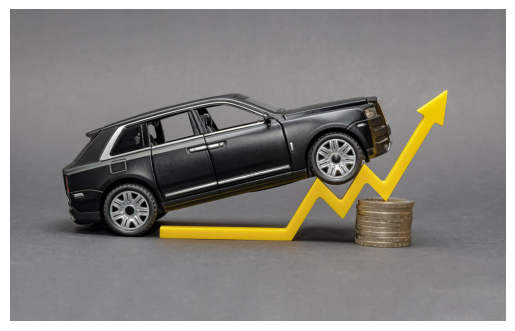

In [3]:
import matplotlib.pyplot as plt
img = plt.imread('Automob_image.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
data = pd.read_csv('auto_imports (2).csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
data["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

## Domain Analysis

### In this dataset we have 26 columns and 201 rows for Automobile Import Price Prediction



**Symboling**:

        Represents the insurance risk rating (+3 indicates risky, -3 indicates safe). It could be an important factor in        determining the car's price, as it directly correlates with insurance costs.
            
        

**Normalized-losses**: 


        This column provides information about the relative average loss payment per insured vehicle year. It might indicate the car's safety and could be correlated with the price.
        

**Make**: 


        The brand or manufacturer of the automobile. Different brands have different price ranges and popularity, which can significantly impact the price prediction.
        

**Fuel-type**: 


        Indicates the type of fuel the vehicle uses, which might affect the price due to varying fuel prices and consumer    preferences.
        

**Aspiration**: 


        Represents the type of aspiration (e.g., standard or turbocharged) in the car's engine. Turbocharged cars tend to be more expensive due to higher performance.
        

**Num-of-doors**: 


        The number of doors the car has. This feature might have an impact on price as certain body styles (e.g., coupes vs. sedans) command different prices.
        

**Body-style**:


        Defines the body style of the car (e.g., sedan, hatchback, convertible). Different body styles often have different price ranges.
        

**Drive-wheels**: 


        Indicates the type of wheels (e.g., front-wheel drive, rear-wheel drive, four-wheel drive). This could affect the    car's performance and price.
        

**Engine-location**: 

        Specifies where the engine is located (e.g., front or rear). This might affect the car's weight distribution and,     subsequently, its price.


**Wheel-base, length, width, height, curb-weight**:


        These columns provide physical dimensions and weight of the car, which can influence its price.
        

**Engine-type, num-of-cylinders, engine-size**: 


        Describes the engine specifications. Cars with larger engines or more cylinders might be more expensive due to      higher performance.
        

**Fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm**: 


        Engine-related features that can affect performance, efficiency, and, subsequently, the price of the car.
        

**City-mpg, highway-mpg**: 



        Represents the fuel efficiency of the vehicle in city and highway conditions. Higher fuel efficiency might influence the price positively.

**Price**: 


        This is the target variable to be predicted. It's the actual import price of the automobile, which depends on all    the aforementioned features and possibly more

## Basic Checks

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.shape

In [ ]:
data.duplicated().sum()

In [ ]:
data.columns

In [ ]:
data.info()

    ** There are some columns that contains '?'. Which are basically null values. so we need to remove these.

In [ ]:
  data = data.replace('?',np.nan)

    ** There are few columns which contains numerical data but having object data type. So, we will convert them into numerical data type for better model performance.

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
col = ['normalized-losses','bore', 'stroke','horsepower', 'peak-rpm',]
for i in col:
    data[i] = pd.to_numeric(data[i])

In [ ]:
data.describe()

In [ ]:
data.describe(include='O')

In [ ]:
data.info()

## Exploratory Data analysis

In [ ]:
## Separating the object and numerical type data
obj_col = data.select_dtypes(include=["object"]).columns.tolist()
num_col = data.select_dtypes(exclude=["object"]).columns.tolist()

In [ ]:
obj_col

In [ ]:
num_col

### Univariate Analysis

In [ ]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in obj_col:
    plt.subplot(4,4,plotnum)
    sns.countplot(x=data[i])
    plotnum+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data['fuel-system'].value_counts()

#### Insights

**Insights of make**
    
    ** Toyota is the most frequently occuring maker company with 32 occurance among 201 instances followed by nissan with 18 instances, mazda with 17 instances and so on. Mercury is the least frequent among all with only 1 occurance.
    
**Insights of fuel-type**

    ** Almost 90% of the cars in our dataset is of gas type, i.e 181 out of 201 instances are of gas type cars whereas there are only 20 instances that shows diesel type car. 
    
**Insights of aspiration**

    ** Majority of the car in our dataset have std aspiration while a very few showed having turbo aspiration.
    
**Insights of num-of-doors**

    ** There are 113 instances which shows that the car have four doors and rest 
    
**Insights of body-style**

    ** sedan is the most frequent occuring body style among all other type of body style in the dataset with 94 instances followed by hatchback , wagon , hardtop and convertible with 68, 25,8 and 6 instances respectively.
    
**Insights of drive-wheels**

    ** Almost 60% of the cars have forward-wheel-drive (fwd) while approx 36% have rear-wheel-drive (rwd) and remaining 5% have four-wheel-drive (4wd)
    
**Insights of engine-location**

    ** Almost all the cars in this dataset have front engine-location while only 3 have rear engine location.
    
**Insights of engine-type**

    ** 'ohc' type of engine is frequently observed on the cars with 145 instances, while rotor is the least used engine type with only 4 instances. Also all other engine types varies between 12-15 instances.
    
**Insights of num-of-cylinders**

    ** Clearly most of the cars have four cylinders with frequency measuring 157, whereas 24 cars have six cylinders, 10 cars have five cylinders, two and eight cylinders car are 4 of each, one car have three cylinders and one have twelve. 
      
    
**Insights of fuel-system**

    ** 'mpfi' is the most common fuel-system among cars with 92 occurances, followed by '2bbl' with 64 occurance, 'idi' with 20 occurance, '1bbl' with 11 occurances, 'spdi' and '4bbl' with 9 and 3 instances respectively, and 'mfi' and 'spfi' with least instances counting one for each fuel-system.

In [ ]:
data["make"].value_counts()

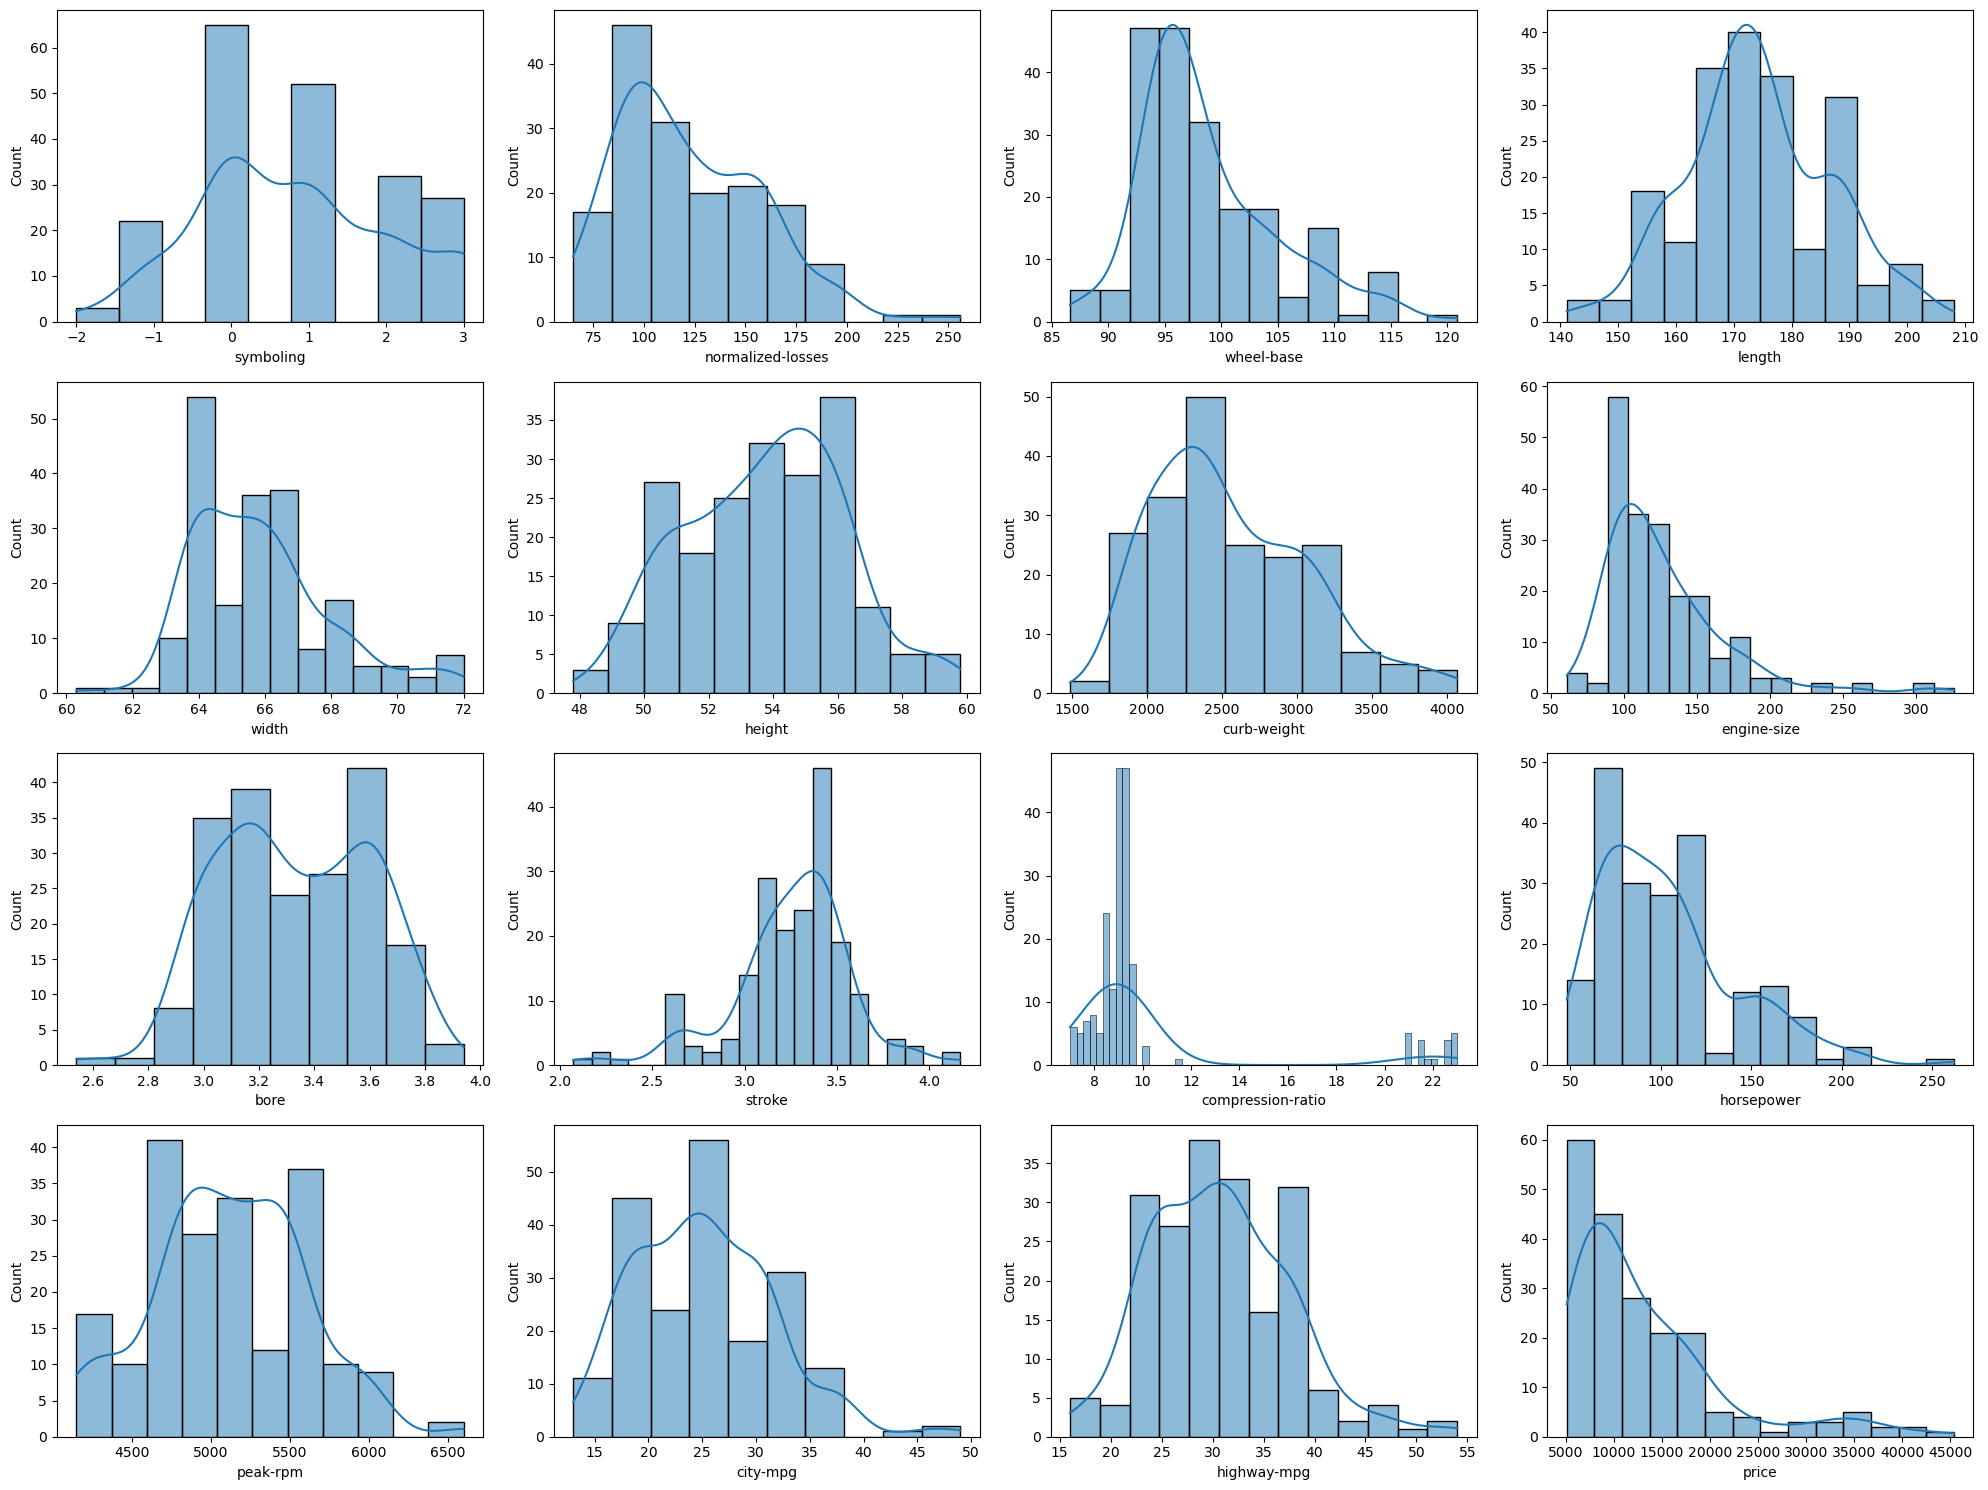

In [23]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in num_col:
    plt.subplot(4,4,plotnum)
    sns.histplot(x=data[i],kde=True)
    plotnum+=1
plt.tight_layout()
plt.show()

**Insights**

### Bivariate Analysis 

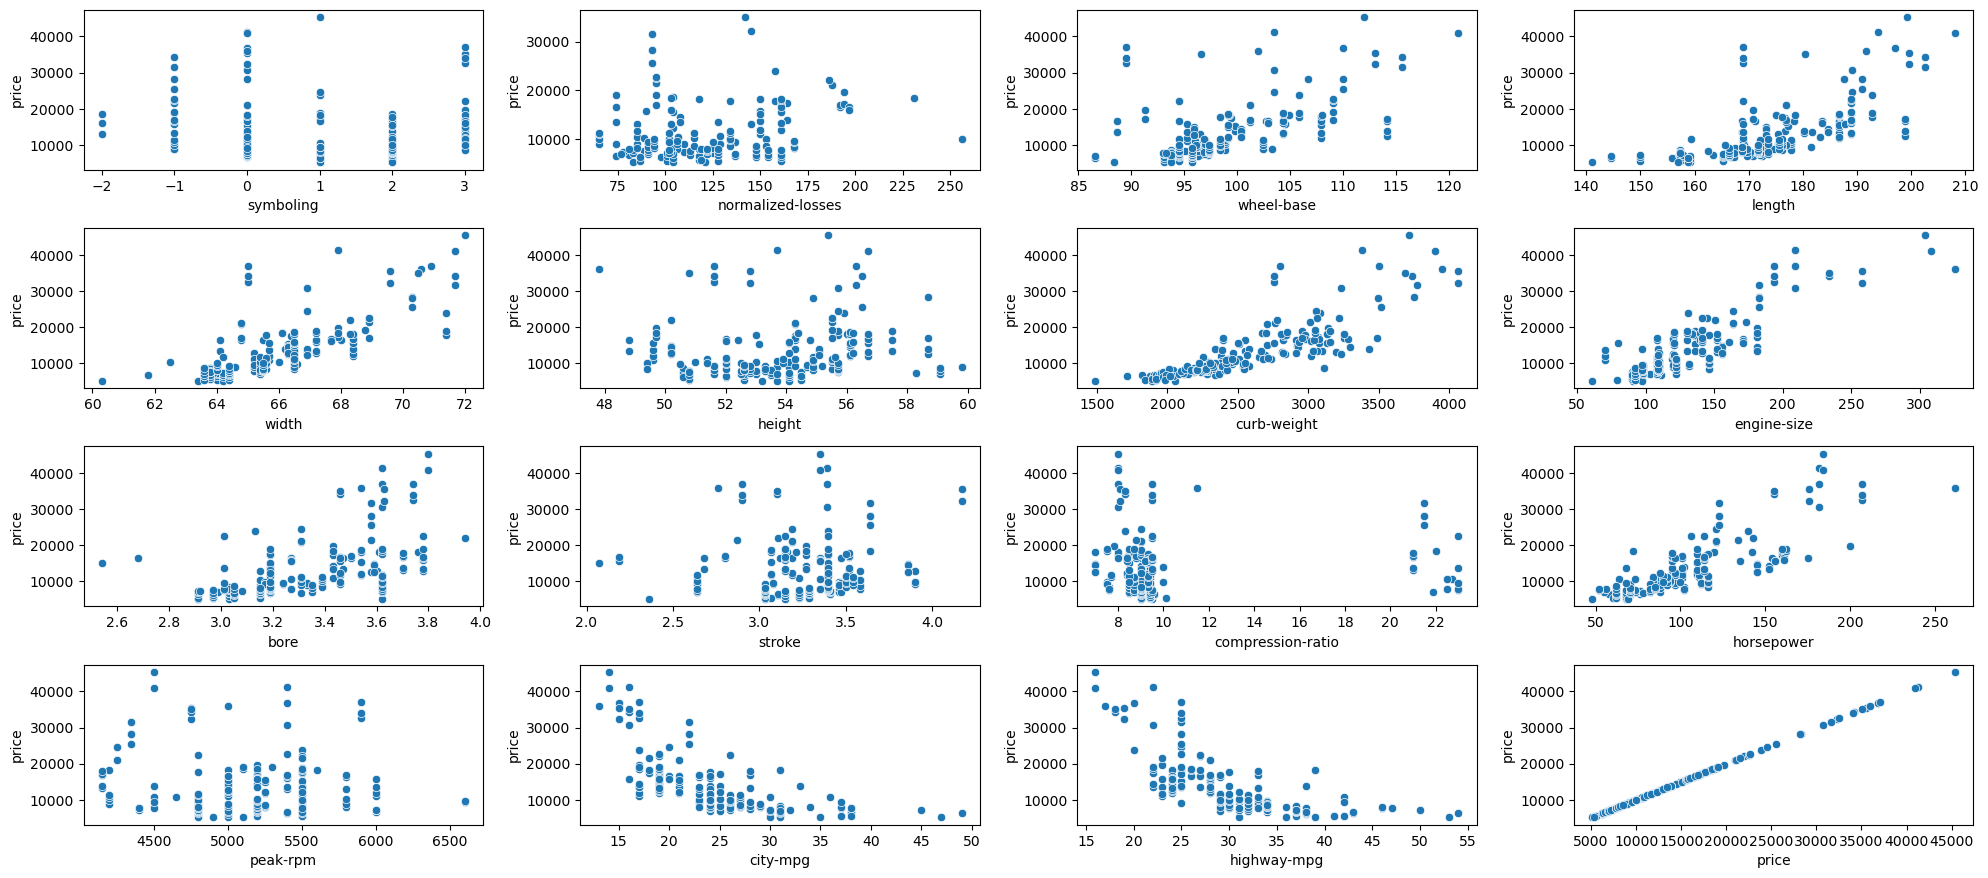

In [24]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in num_col:
    plt.subplot(7,4,plotnum)
    sns.scatterplot(x=data[i],y=data['price'])
    plotnum+=1
plt.tight_layout()
plt.show()

 **Insights**
 
       ** No specific link is discovered.

In [25]:
obj_col

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

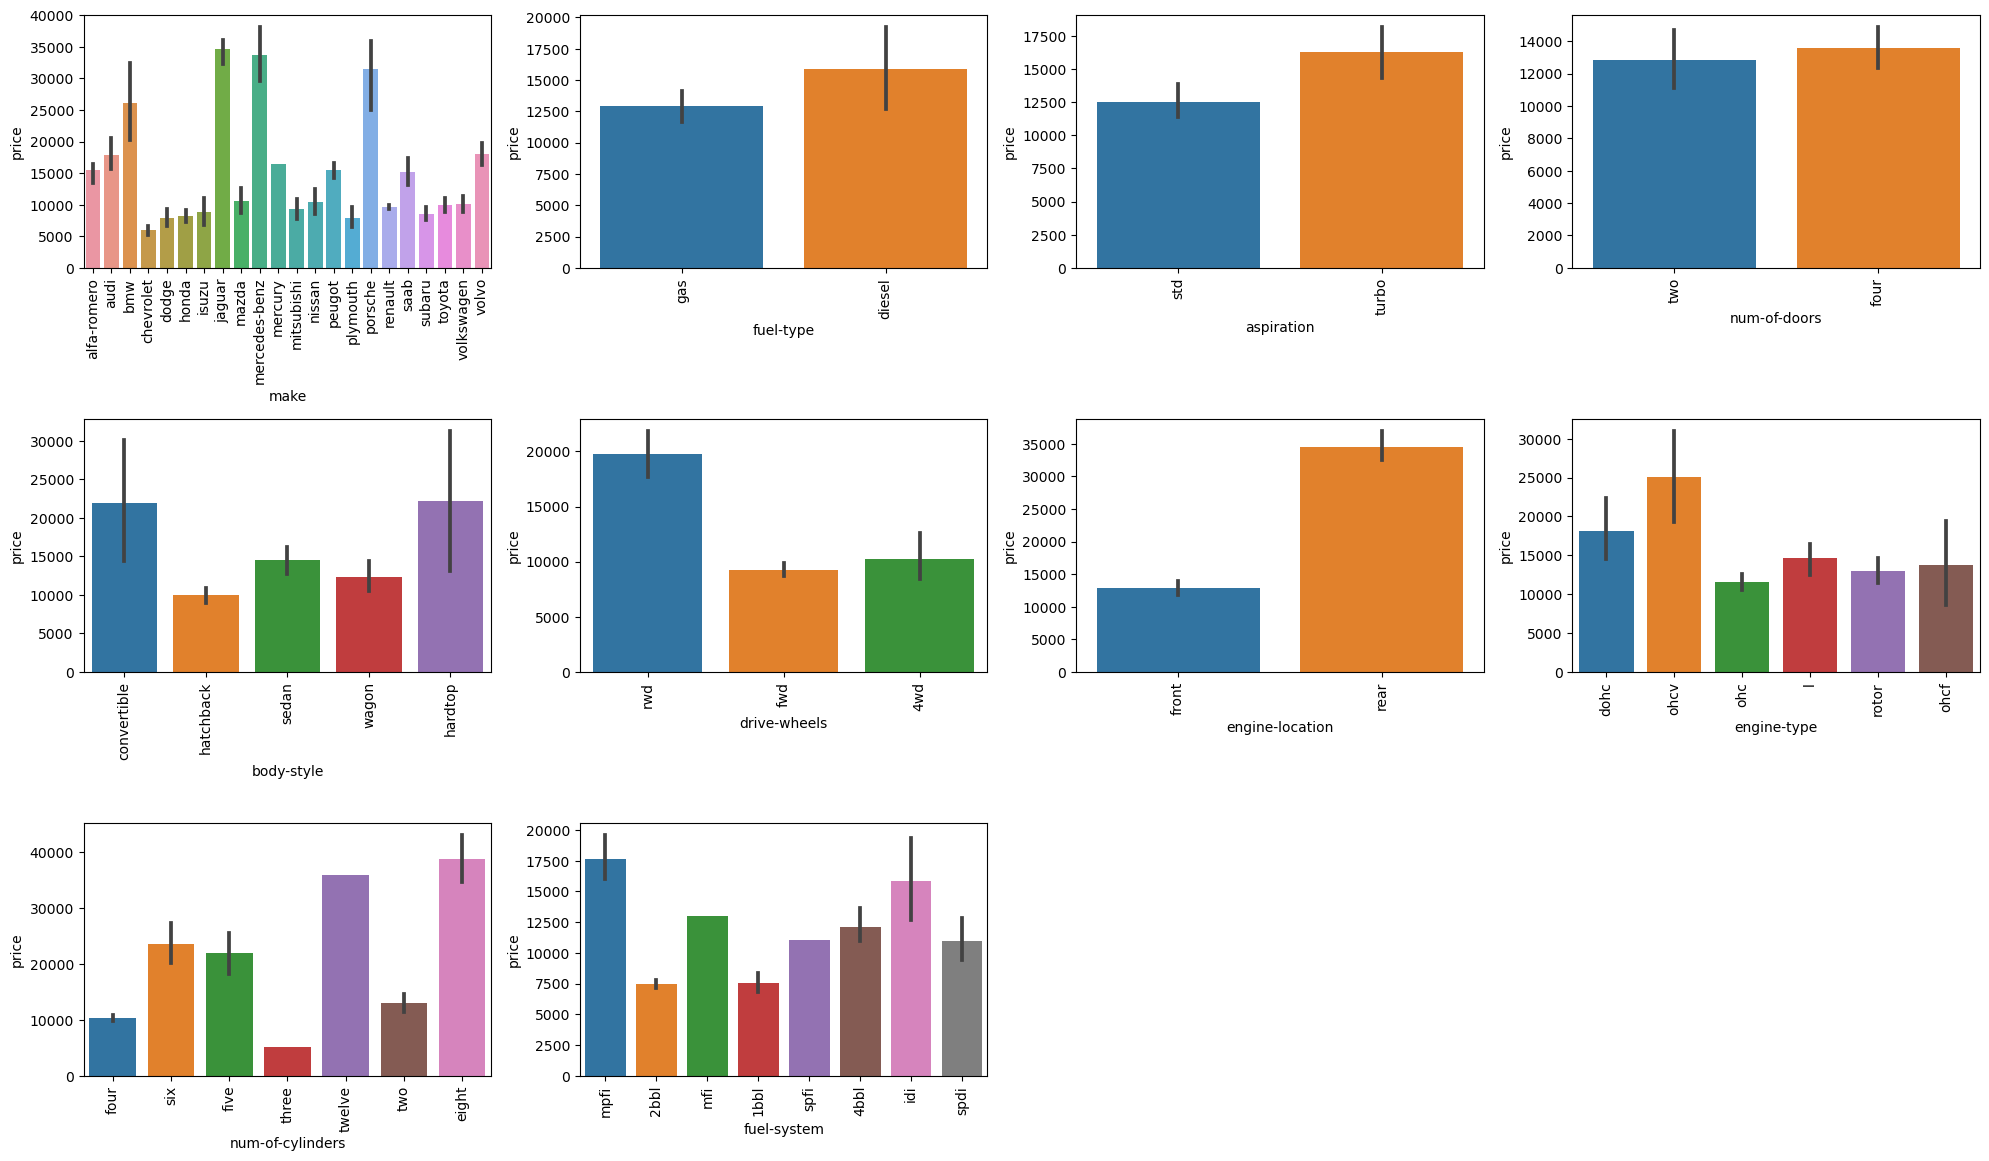

In [26]:
plt.figure(figsize=(20,15))
plotnum = 1
for i in obj_col:
    plt.subplot(4,4,plotnum)
    sns.barplot(x=data[i],y=data['price'])
    plotnum += 1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights**



## Data Preprocessing

In [27]:
# Handling Null/Corrupted values
data.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [28]:
data.loc[data['normalized-losses'].isnull(),'normalized-losses']=data['normalized-losses'].median()
data.loc[data['bore'].isnull(),'bore']=data['bore'].median()
data.loc[data['stroke'].isnull(),'stroke']=data['stroke'].median()
data.loc[data['horsepower'].isnull(),'horsepower']=data['horsepower'].median()
data.loc[data['peak-rpm'].isnull(),'peak-rpm']=data['peak-rpm'].median()
data.loc[data['num-of-doors'].isnull(),'num-of-doors']='four'

In [29]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [30]:
# Converting Categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [31]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['make'] = lc.fit_transform(data['make'])
data['body-style'] = lc.fit_transform(data['body-style'])
data['engine-type']=lc.fit_transform(data['engine-type'])
data['fuel-system']=lc.fit_transform(data['fuel-system'])

In [32]:
data['fuel-type']=data['fuel-type'].map({'gas':0,'diesel':1})
data['aspiration']=data['aspiration'].map({'std':0,'turbo':1})
data['num-of-doors']=data['num-of-doors'].map({'two':2,'four':4,'':4})
data['engine-location']=data['engine-location'].map({'front':0,'rear':1})
data['num-of-cylinders']=data['num-of-cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

In [33]:
df = pd.get_dummies(data['drive-wheels'],prefix='drive-wheels',drop_first = True)
data = pd.concat([data,df],axis=1).drop(['drive-wheels'],axis=1)

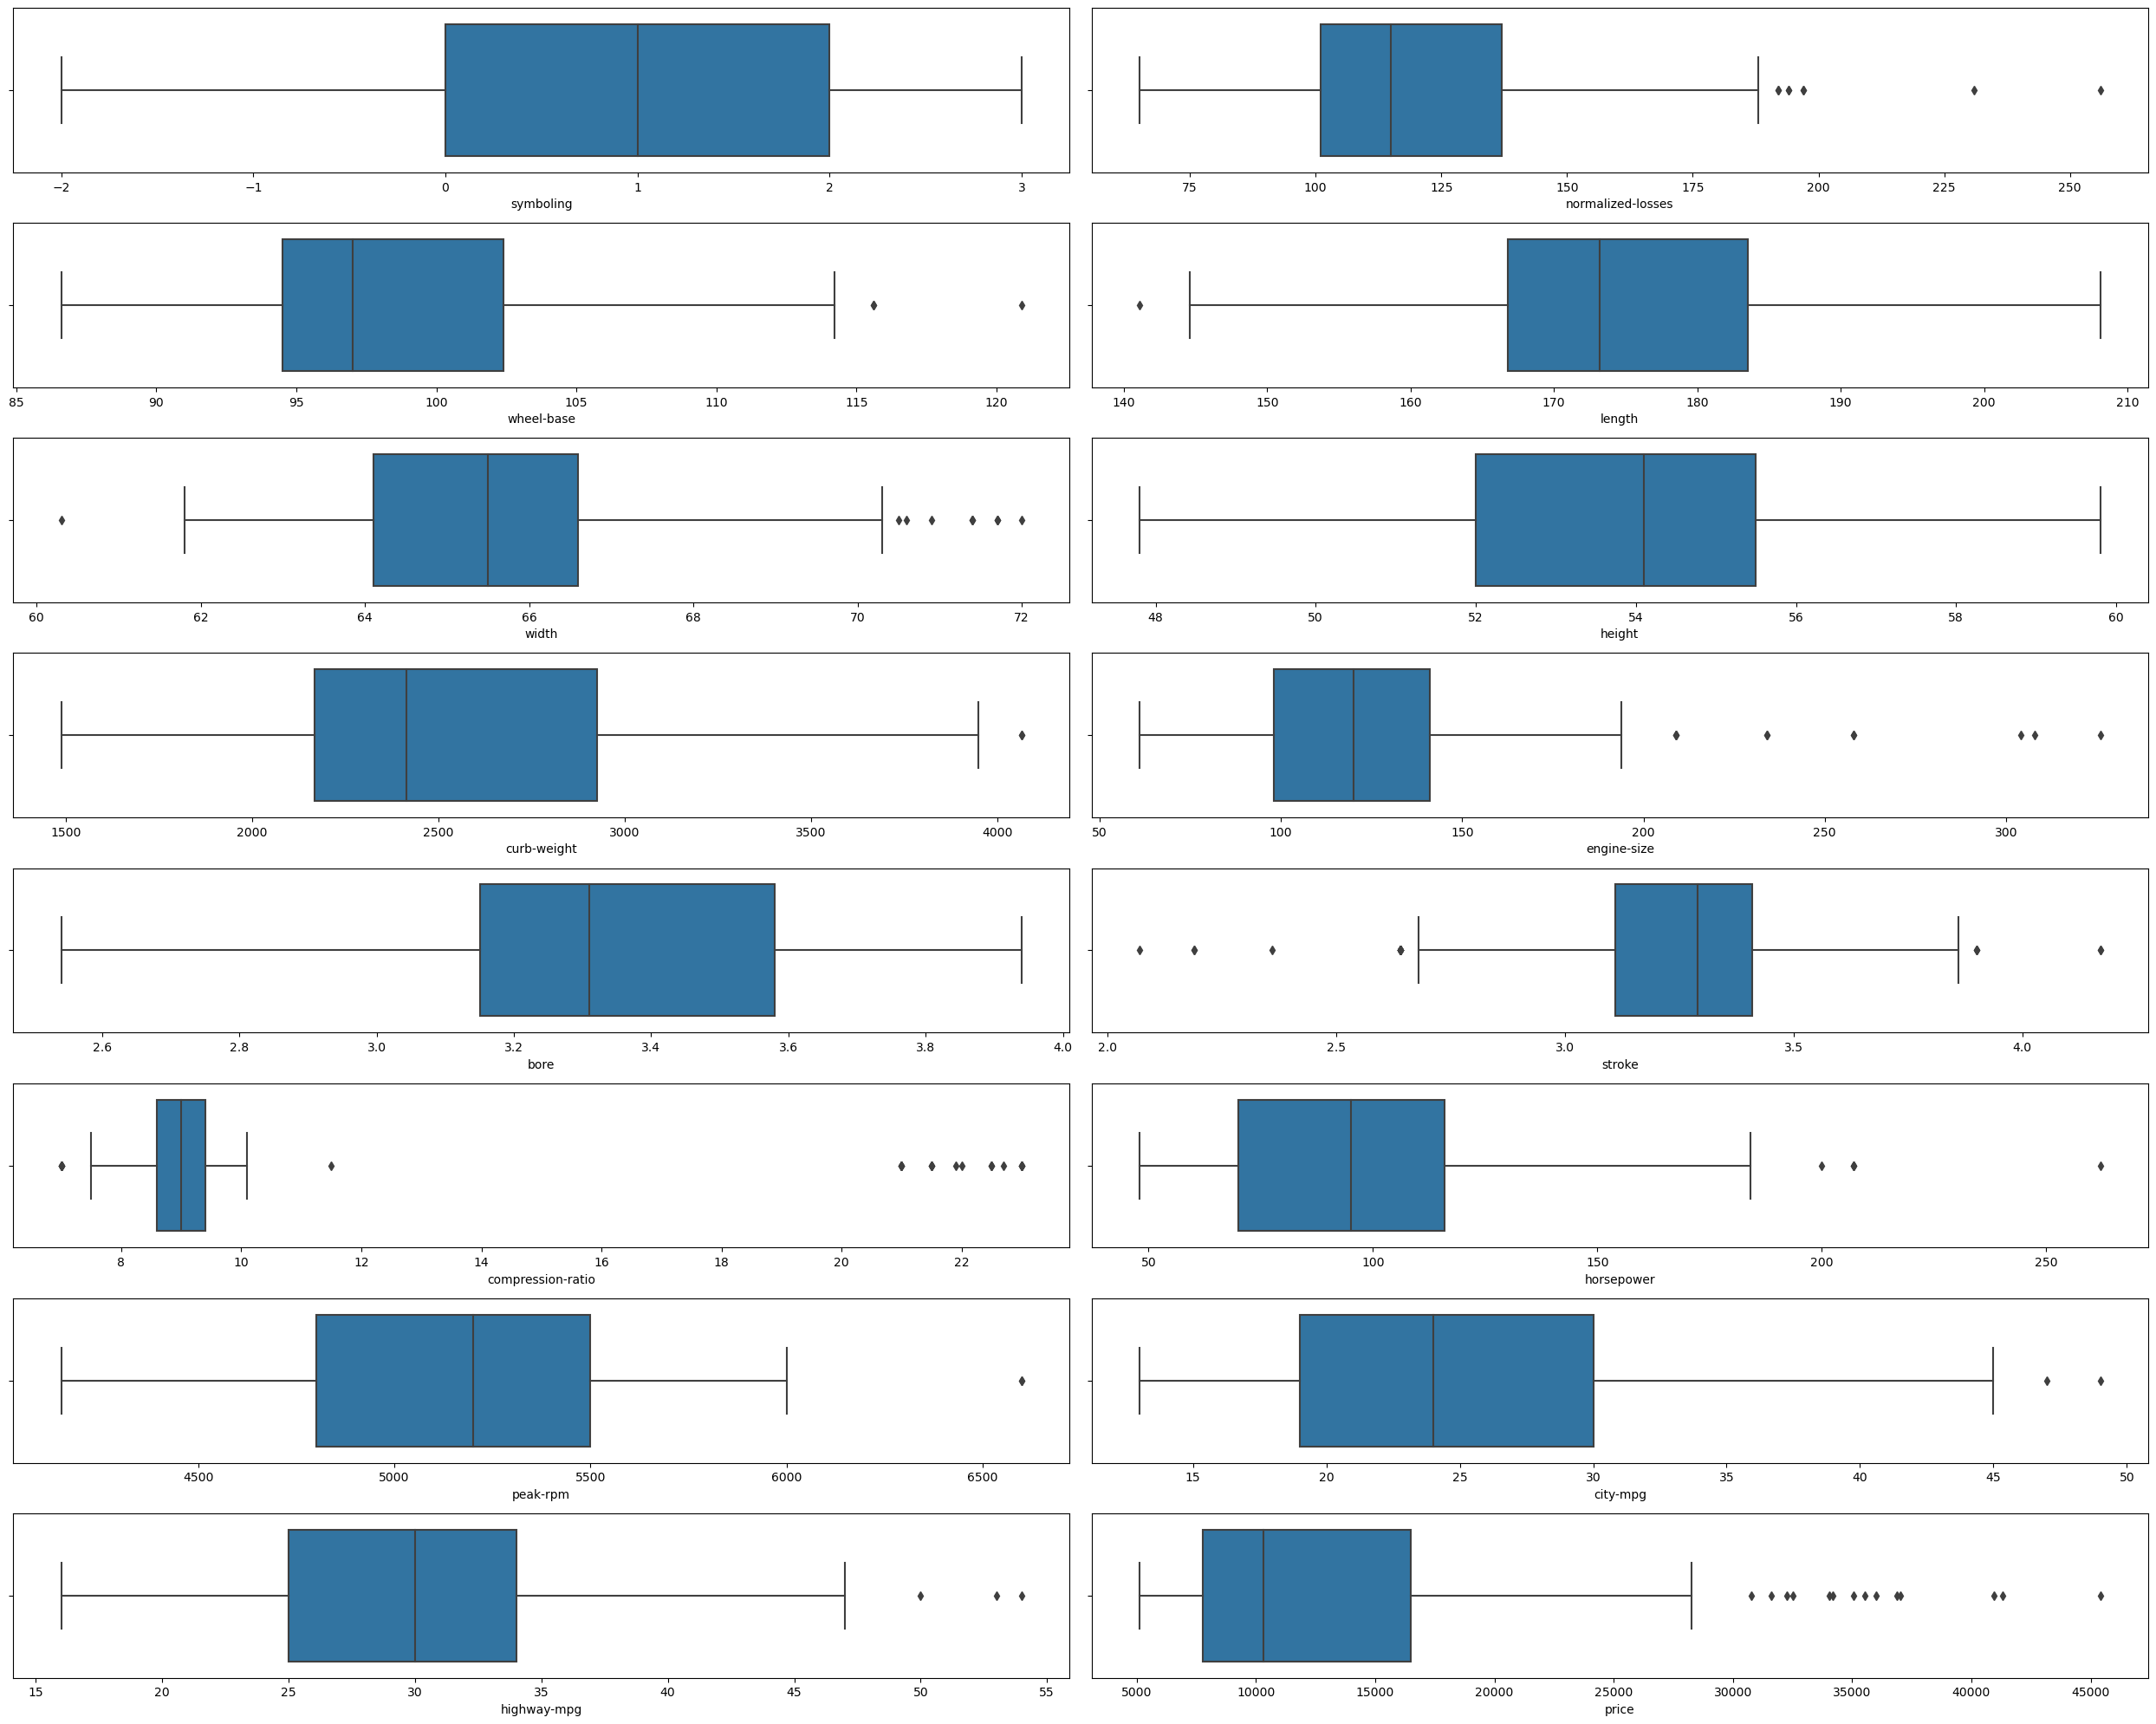

In [34]:
# Handling Outliers
plt.figure(figsize=(25,20))
plotnum = 1
for i in num_col:
    plt.subplot(8,2,plotnum)
    sns.boxplot(x=data[i])
    plotnum += 1
plt.tight_layout()
plt.show()

In [35]:
q1 = 0
q3 = 0
iqr = 0
ul = 0
ll = 0
for i in num_col:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr 
    ul = q3 + 1.5*iqr
    data.loc[data[i]<=ll,i]=data[i].median()
    data.loc[data[i]>=ul,i]=data[i].median()

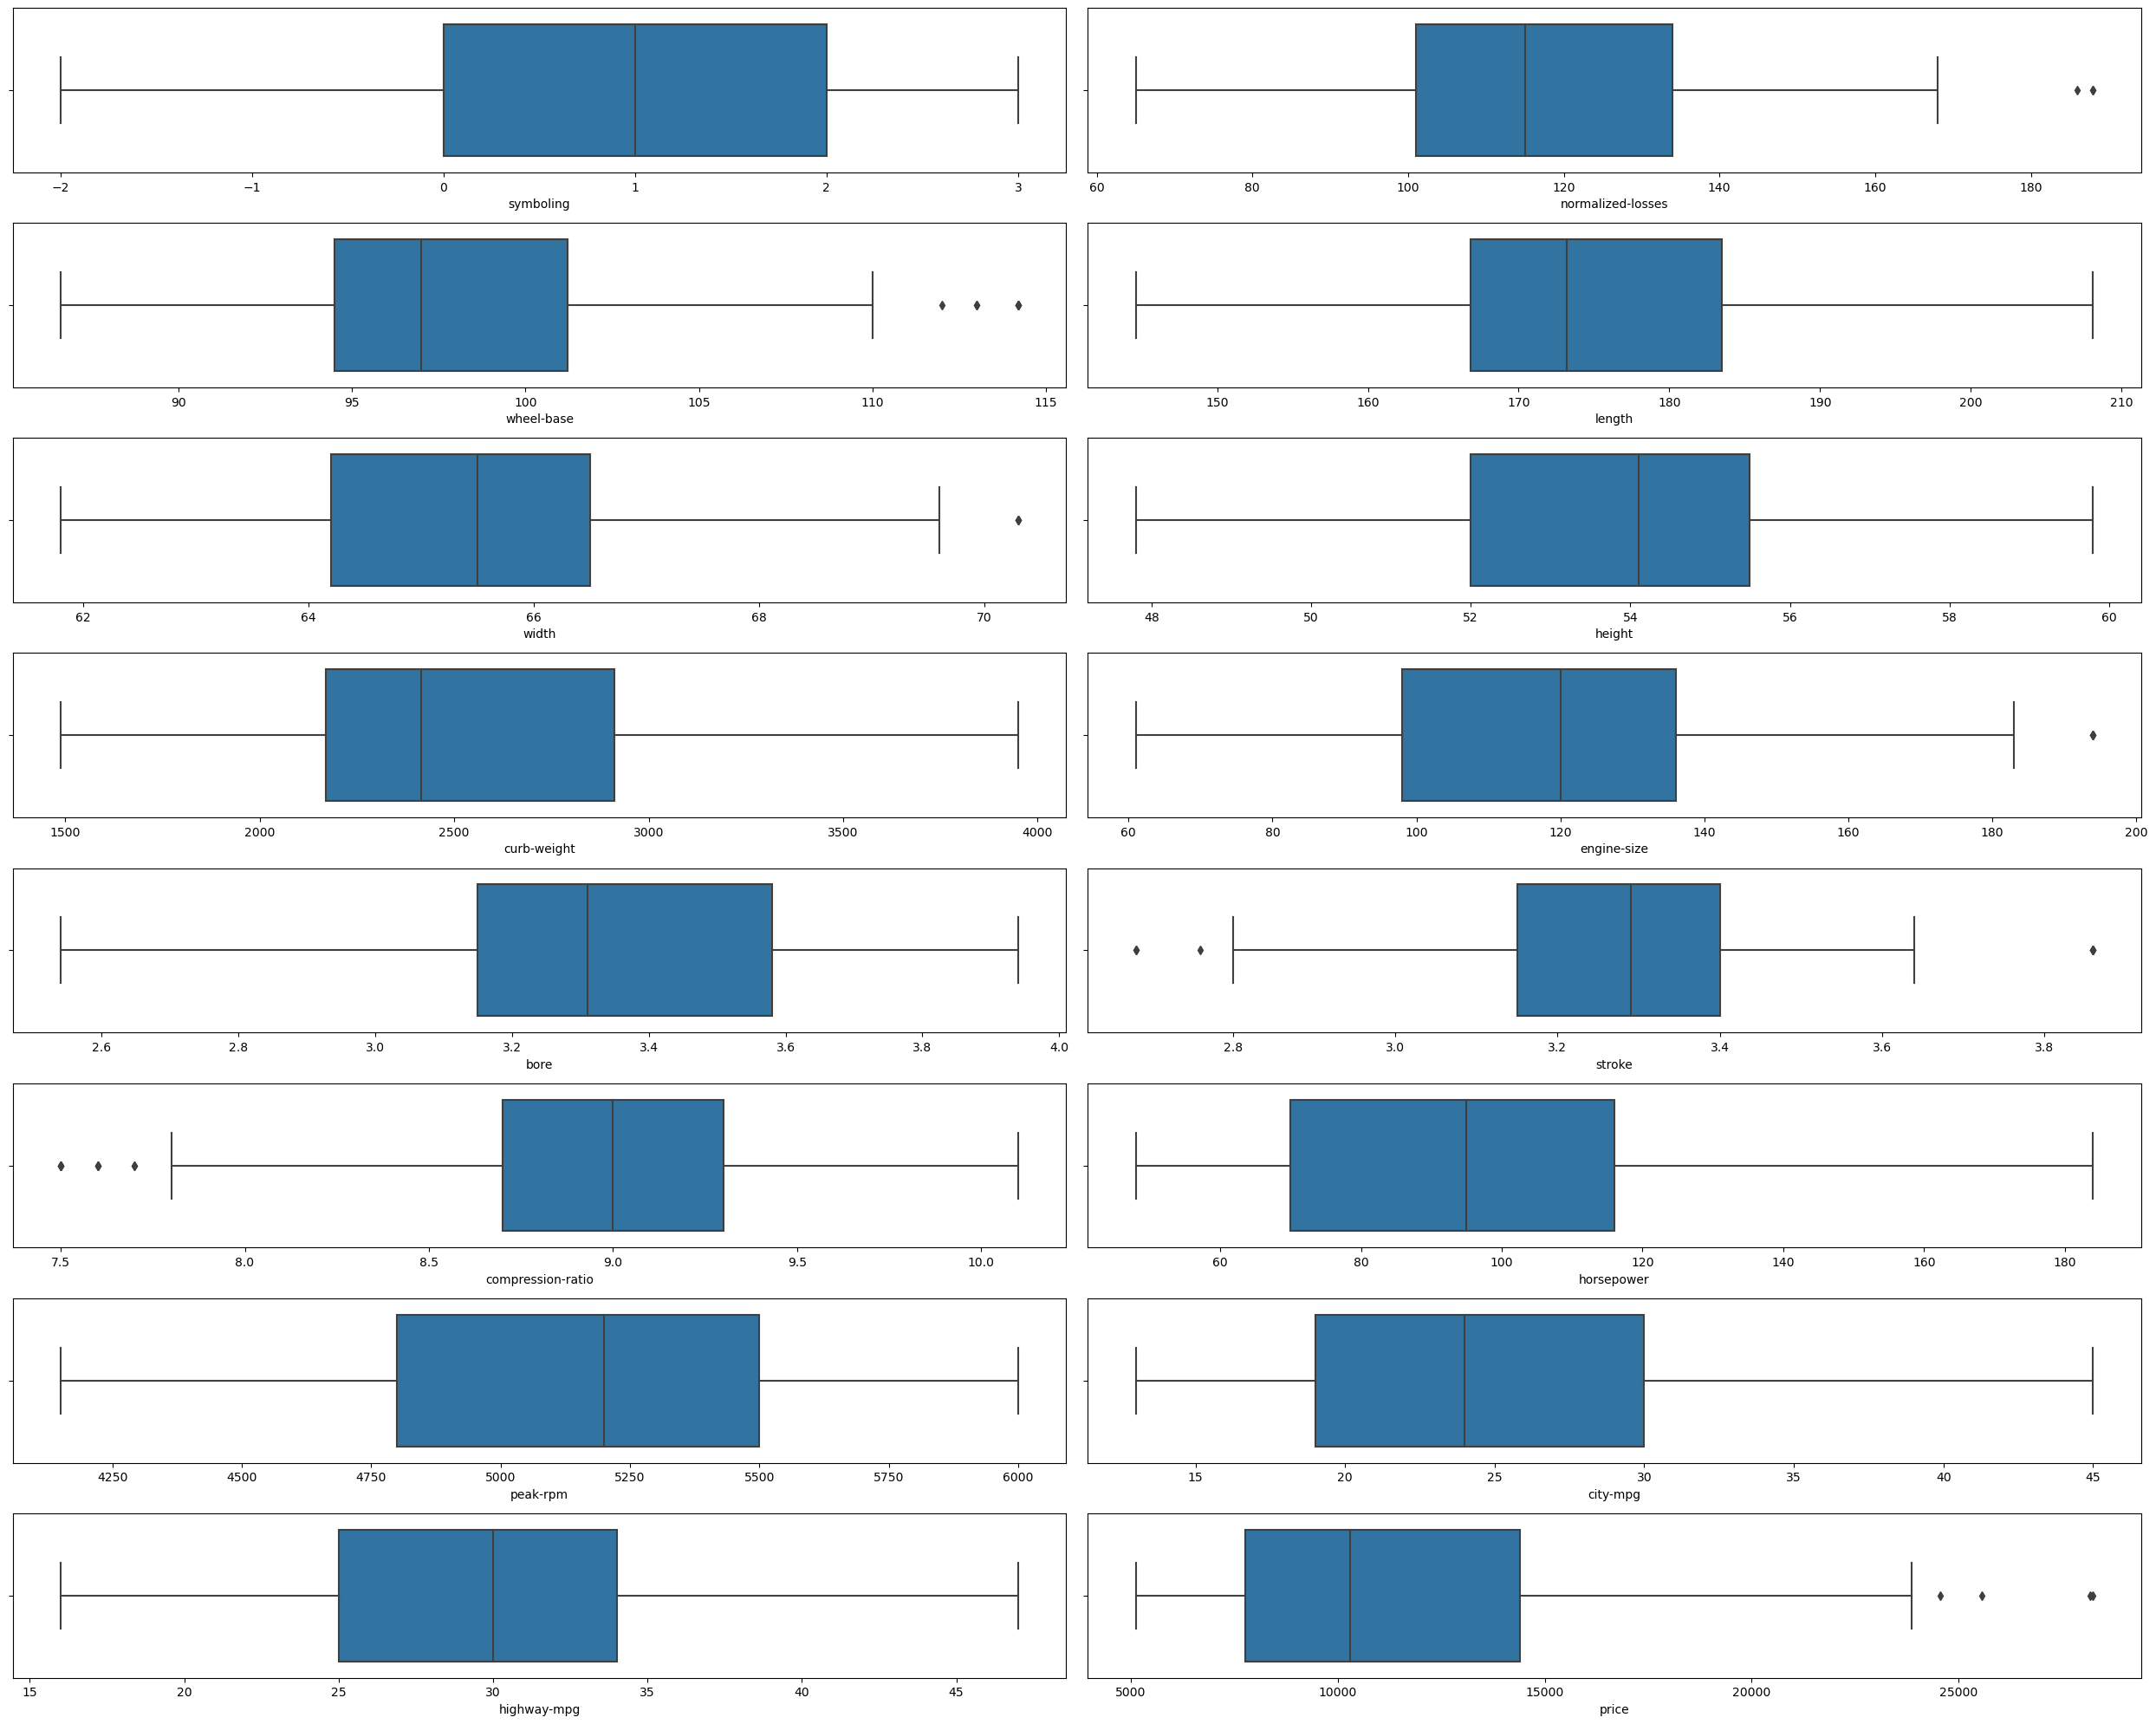

In [36]:
plt.figure(figsize=(25,20))
plotnum = 1
for i in num_col:
    plt.subplot(8,2,plotnum)
    sns.boxplot(x=data[i])
    plotnum += 1
plt.tight_layout()
plt.show()

In [37]:
num_col_scal = ['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [38]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_col_scal] = scaler.fit_transform(data[num_col_scal])

In [39]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,drive-wheels_fwd,drive-wheels_rwd
0,1.0,0.406504,0,0,0,2,0,0,0.072464,0.381102,0.270588,0.083333,0.430544,0,4,0.518797,5,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000,0.354839,13495,0,1
1,1.0,0.406504,0,0,0,2,0,0,0.072464,0.381102,0.270588,0.083333,0.430544,0,4,0.518797,5,0.664286,0.000000,0.576923,0.463235,0.459459,0.25000,0.354839,16500,0,1
2,0.6,0.406504,0,0,0,2,2,0,0.286232,0.418898,0.435294,0.383333,0.542242,4,6,0.684211,5,0.100000,0.669492,0.576923,0.779412,0.459459,0.18750,0.322581,16500,0,1
3,0.8,0.804878,1,0,0,4,3,0,0.478261,0.503937,0.517647,0.541667,0.344842,2,4,0.360902,5,0.464286,0.610169,0.961538,0.397059,0.729730,0.34375,0.451613,13950,1,0
4,0.8,0.804878,1,0,0,4,3,0,0.463768,0.503937,0.541176,0.541667,0.542648,2,5,0.563910,5,0.464286,0.610169,0.192308,0.492647,0.729730,0.15625,0.193548,17450,0,0


## Feature Engineering

In [40]:
# Check for correlation
# This is done on the continuous data and dropping the target column

In [41]:
num_col_scal 

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [42]:
data1 = data[num_col_scal]

<Axes: >

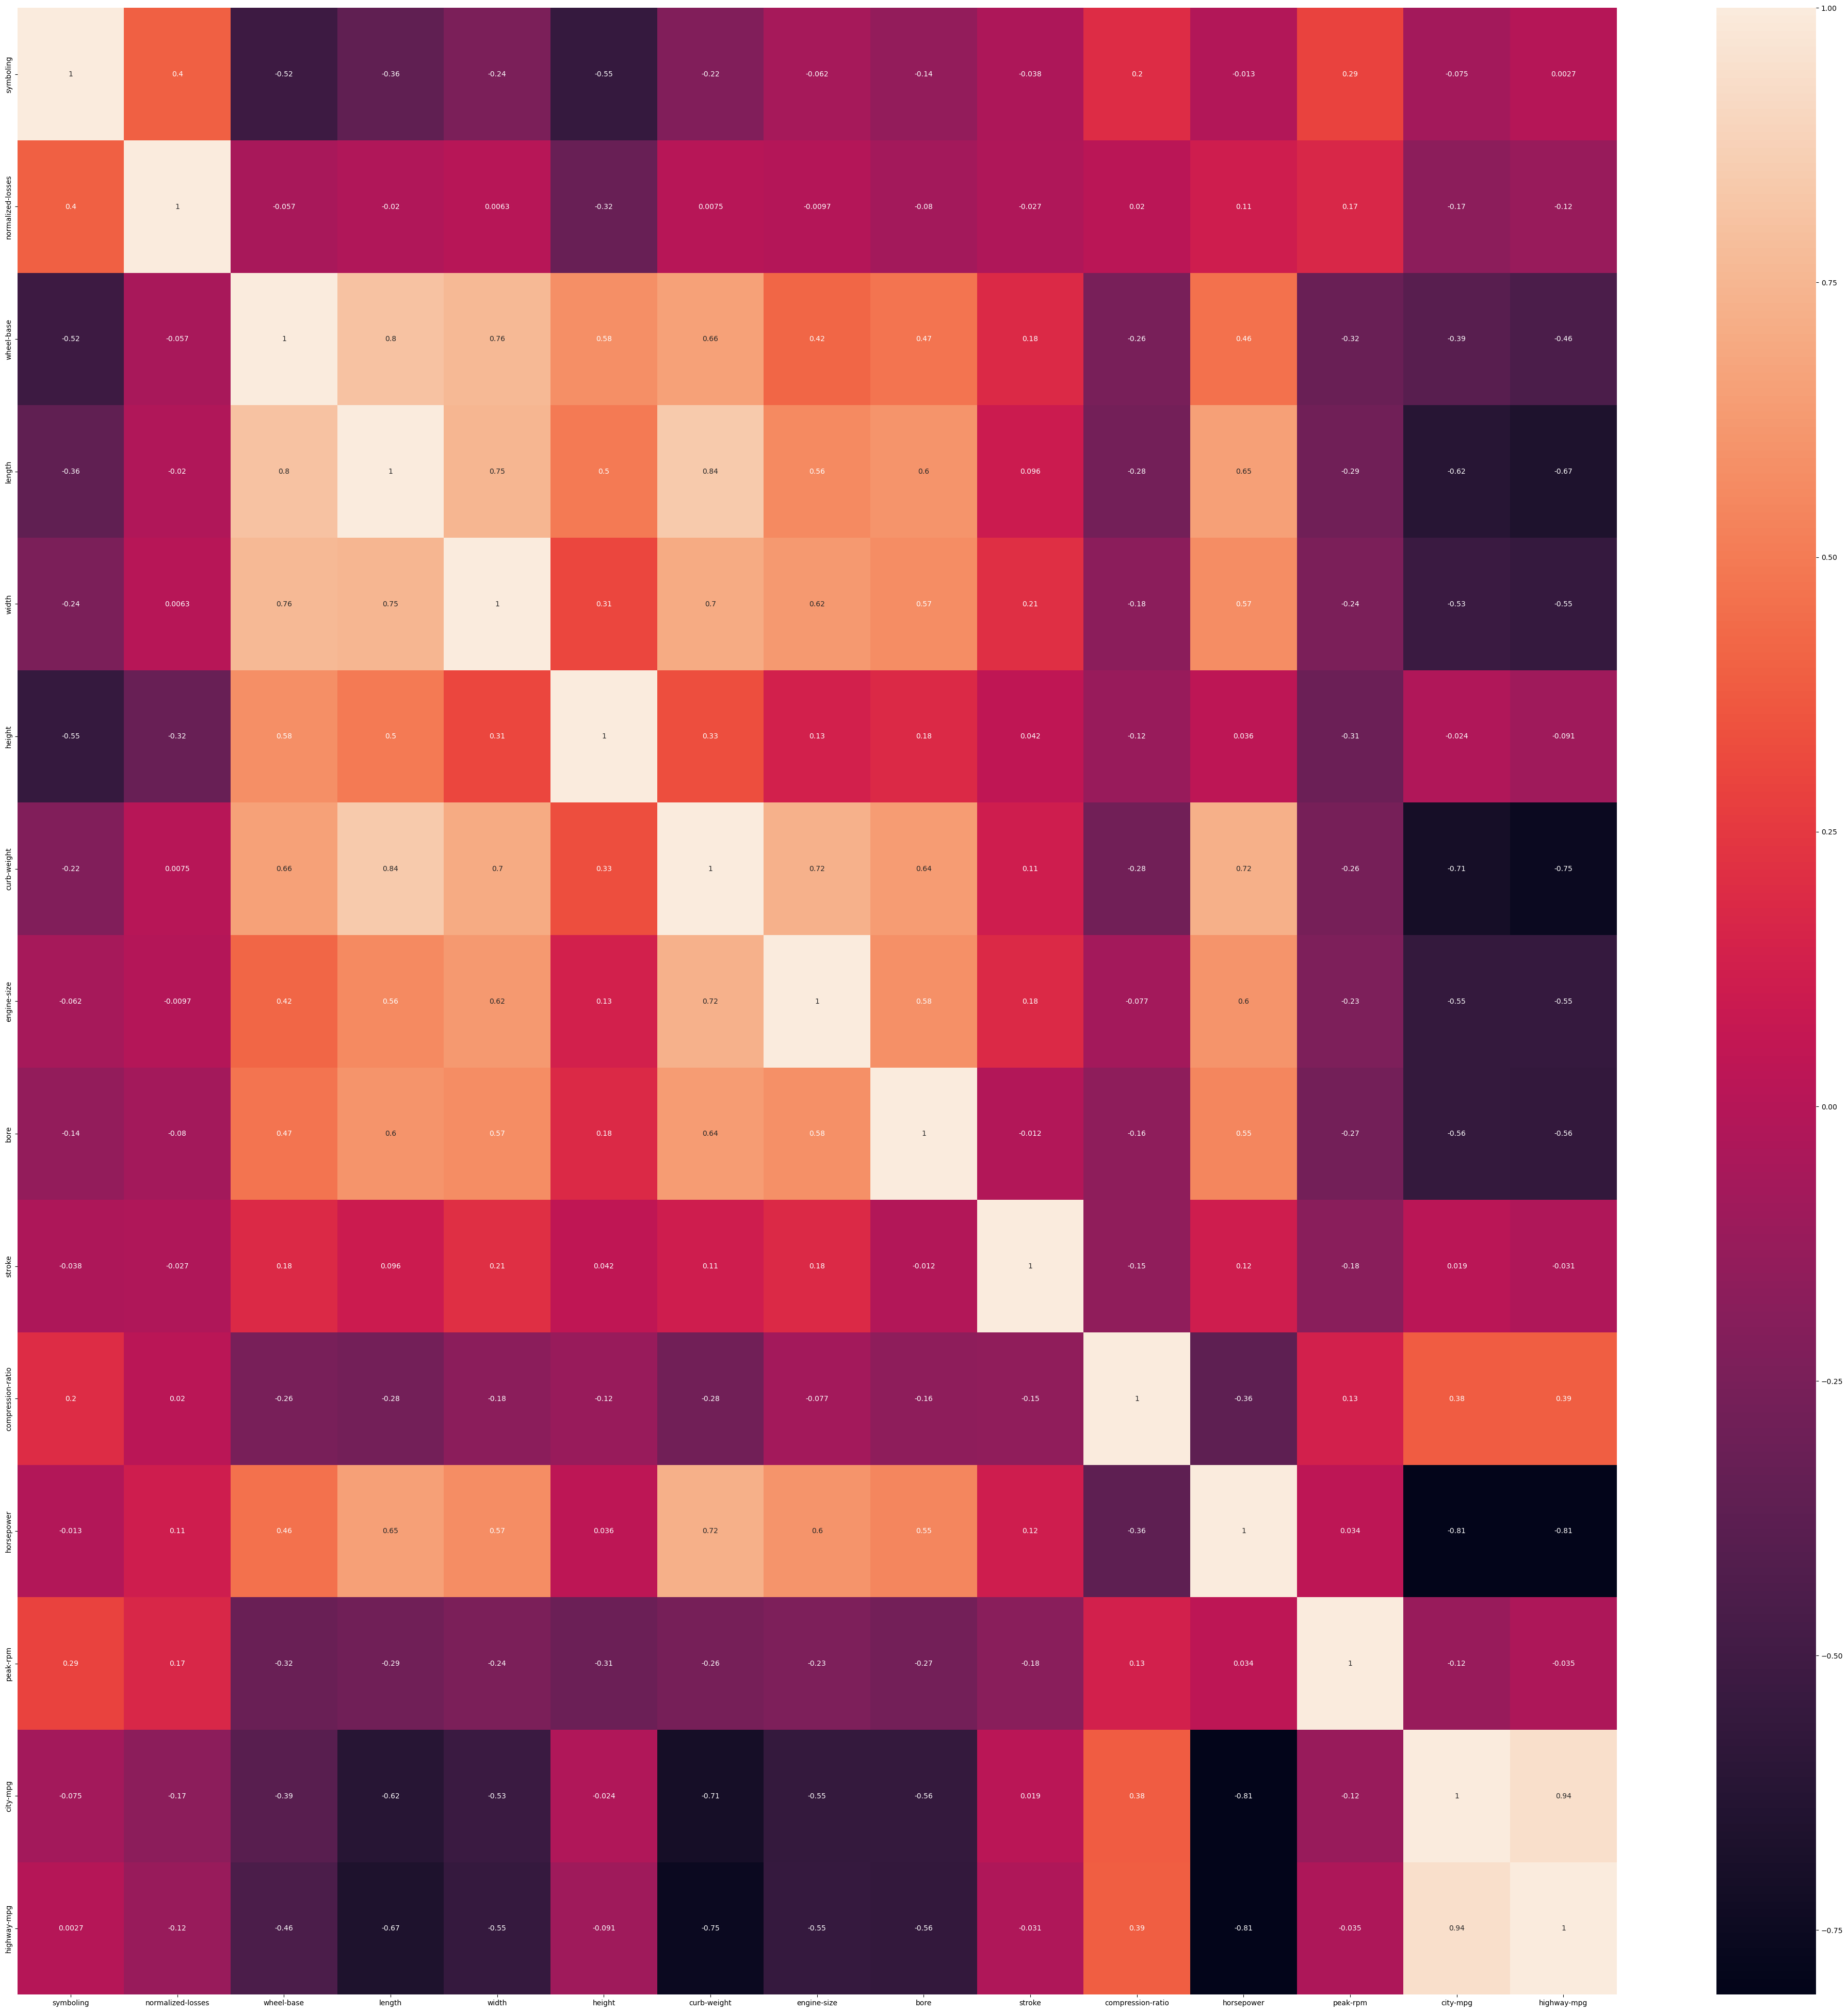

In [43]:
plt.figure(figsize=(50,50))
sns.heatmap(data1.corr(),annot = True)

## Splitting Data

In [44]:
x = data.drop('price',axis=1)
y = data['price']

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

## Linear Regression

### Model Creation

In [46]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model_LR = LR.fit(x_train,y_train)
model_LR

LinearRegression()

In [47]:
y_pred_LR = model_LR.predict(x_test)

### Model Evaluation

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluation(a,b):
    MSE = mean_squared_error(a,b)
    MAE = mean_absolute_error(a,b)
    R2  = r2_score(a,b)
    print('MSE :',MSE)
    print('MAE : ',MAE)
    print("R2_Score : ",R2)

In [49]:
evaluation(y_test,y_pred_LR)

MSE : 4959892.2579039335
MAE :  1665.7266965152116
R2_Score :  0.7086042151013061


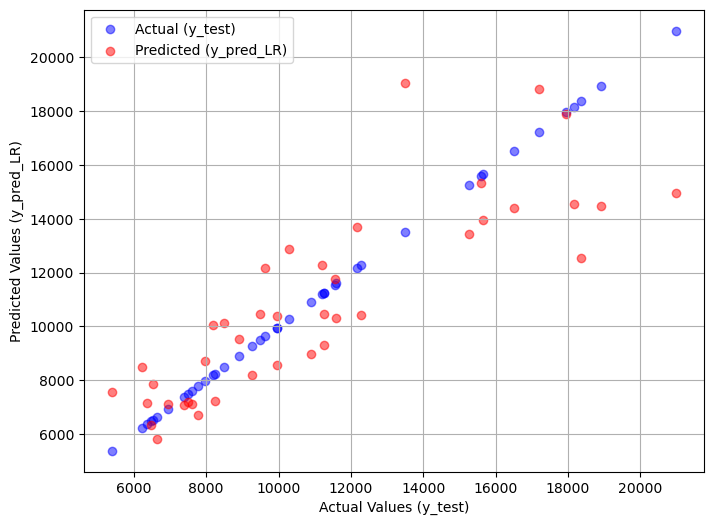

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_LR,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_LR)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_LR)")
plt.legend()
plt.grid(True)
plt.show()

## KNN

### Model Creation

In [51]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
model_KNN = KNN.fit(x_train,y_train)
model_KNN

KNeighborsRegressor(n_neighbors=3)

In [52]:
y_pred_KNN = model_KNN.predict(x_test)

### Model Evaluation

In [53]:
evaluation(y_test,y_pred_KNN)

MSE : 4546583.303523035
MAE :  1595.9918699186992
R2_Score :  0.7328862923935209


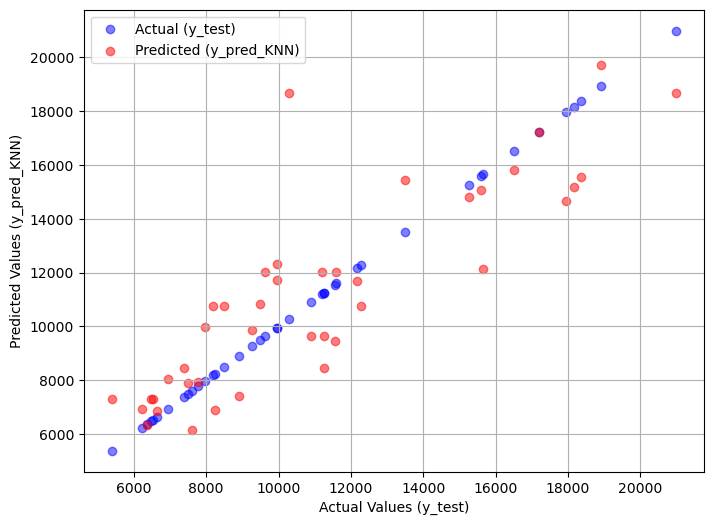

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_KNN,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_KNN)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_KNN)")
plt.legend()
plt.grid(True)
plt.show()

## SVM

### Model Creation

In [55]:
from sklearn.svm import SVR
svr = SVR()
model_svr = svr.fit(x_train,y_train)
model_svr

SVR()

In [56]:
y_pred_SVR = model_svr.predict(x_test)

### Model Evaluation

In [57]:
evaluation(y_test,y_pred_SVR)

MSE : 17678288.16417112
MAE :  3308.7569127414354
R2_Score :  -0.038606967128136827


### Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(svr,x,y,cv=5,scoring='r2')

print("Cross-validation R2 Scores: ",scores)
print("Mean R2 Score: ",scores.mean())
print("Standard Deviation of R2 Score: ",scores.std())

Cross-validation R2 Scores:  [-0.04485266 -0.08164107 -0.0456231  -0.01851967 -0.56427808]
Mean R2 Score:  -0.1509829162958387
Standard Deviation of R2 Score:  0.20762081815307445


### HyperParameter Tuning for SVM

In [59]:
# We use GridSearch CV
from sklearn.model_selection import GridSearchCV
# Defining Hyperparameter
param_grid = {'C':[0.001,0.01,0.1,1,2,5,6,70,80],'kernel':['linear'],'epsilon':[0.01,0.1,0.2,0.5,1]}
model=SVR()
grid = GridSearchCV(model,param_grid,verbose=2,scoring='r2',cv=5)
grid.fit(x,y)
print(grid.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...............C=0.001, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, epsilon=0.2, 

[CV] END ....................C=2, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.2, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END ....................C=2, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ...................C=80, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END ...................C=80, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END ...................C=80, epsilon=0.5, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .....................C=80, epsilon=1, kernel=linear; total time=   0.0s
{'C': 80, 'epsilon': 0.01, 'kernel': 'linear'}


In [60]:
svr = SVR(kernel='linear',epsilon=0.01,C=80)
svr.fit(x_train,y_train)
y_pred_svr_2 = svr.predict(x_test)

### Model Evaluation

In [61]:
evaluation(y_test,y_pred_svr_2)

MSE : 7653566.192757826
MAE :  2028.9688749162294
R2_Score :  0.5503497229282011


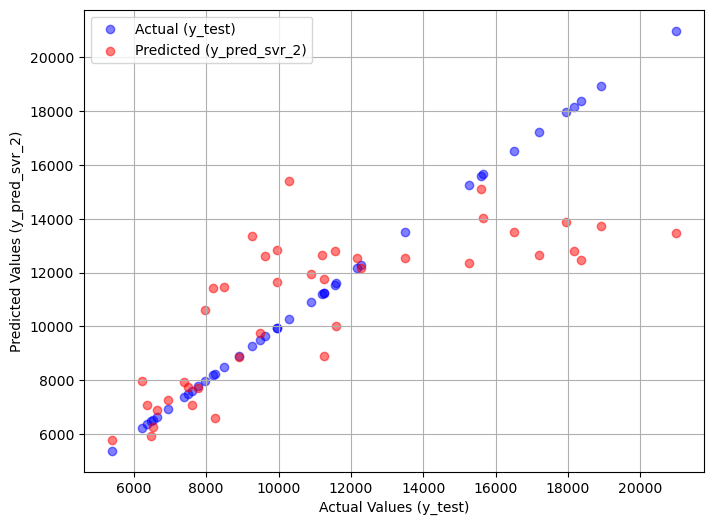

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_svr_2,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_svr_2)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_svr_2)")
plt.legend()
plt.grid(True)
plt.show()

## Decision tree

### Model Creation

In [63]:
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()
model_dct = dct.fit(x_train,y_train)
model_dct

DecisionTreeRegressor()

In [64]:
y_pred_dct = model_dct.predict(x_test)

### Model Evaluation

In [65]:
evaluation(y_test,y_pred_dct)

MSE : 4698204.640243903
MAE :  1453.060975609756
R2_Score :  0.7239784742144546


### HyperParameter Tuning for Decision Tree

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor,param_grid,scoring='r2',cv=5)
grid_search.fit(x,y)
best_params = grid_search.best_params_
print("Best HyperParameters: ")
print(best_params)

Best HyperParameters: 
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [67]:
dt = DecisionTreeRegressor(max_depth= None,max_features='sqrt',min_samples_leaf= 4, min_samples_split=2)
dt.fit(x_train,y_train)
y_pred_dct_2 = dt.predict(x_test)

### Model Evaluation

In [68]:
evaluation(y_test,y_pred_dct_2)

MSE : 5090680.393562027
MAE :  1606.2657375145182
R2_Score :  0.7009203563673198


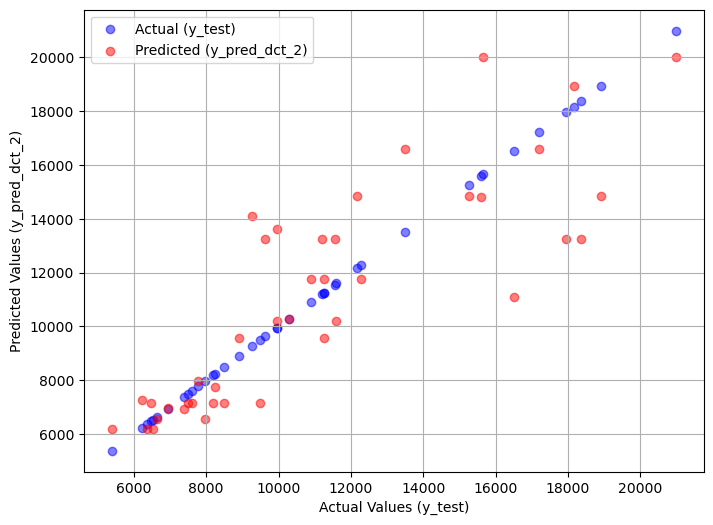

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_dct_2,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_dct_2)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_dct_2)")
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

### Model Creation

In [70]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
model_rfr = rfr.fit(x_train,y_train)
model_rfr

RandomForestRegressor()

In [71]:
y_pred_rfr = model_rfr.predict(x_test)

### Model Evaluation

In [72]:
evaluation(y_test,y_pred_rfr)

MSE : 1951405.3004989359
MAE :  1012.0154186991871
R2_Score :  0.8853541065759634


### HyperParameter Tuning

In [73]:
#initializie the libraries and parameters 
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [74]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rfr_ht=RandomForestRegressor(random_state=42)
rfr_cv = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter=100, cv=3, verbose=1, 
                            random_state=42, n_jobs=-1, scoring='r2')
rfr_cv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [75]:
rf_best_params=rfr_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 82, 'bootstrap': True}


In [76]:
rfr1=RandomForestRegressor(n_estimators=400,max_features='sqrt',max_depth=82,min_samples_split=10,
                           min_samples_leaf=4,random_state=42,bootstrap=True,verbose=2)
rfr1.fit(x_train,y_train)
y_pred_rfr_2=rfr1.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


### Model Evaluation 

In [77]:
evaluation(y_test,y_pred_rfr_2)

MSE : 3110282.9102423065
MAE :  1323.5814634978767
R2_Score :  0.8172695528934603


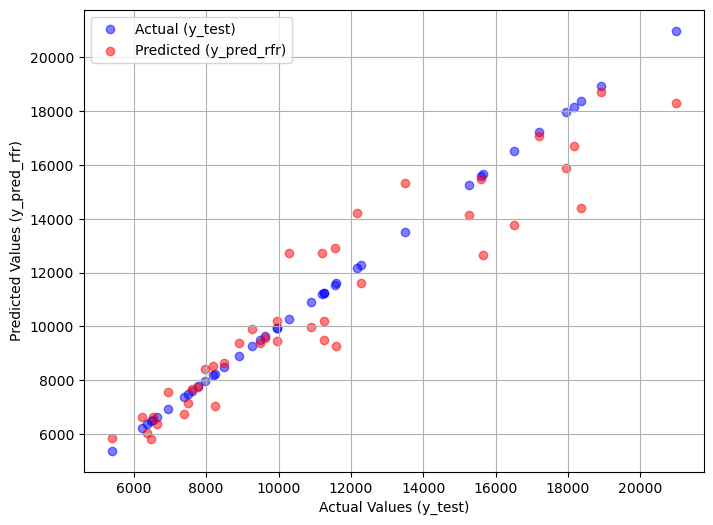

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_rfr,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_rfr)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_rfr)")
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

### Model Creation

In [79]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_xgb = xgb.fit(x_train,y_train)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred_xgb = model_xgb.predict(x_test)

### Model Evaluation

In [81]:
evaluation(y_test,y_pred_xgb)

MSE : 2395240.876856234
MAE :  1120.7555973704268
R2_Score :  0.8592785772270144


### HyperParameter Tuning

In [82]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBRegressor(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(x,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 51.2, 'reg_alpha': 25.6, 'n_estimators': 115, 'max_depth': 14, 'learning_rate': 0.06, 'gamma': 0.2})


In [83]:
xgb2=XGBRegressor(reg_lambda=51.2,reg_alpha=25.6,n_estimators=115,max_depth=14,learning_rate=0.06,gamma=0.2,random_state=42)
xgb2.fit(x_train,y_train)
y_pred_xgb_2=xgb2.predict(x_test)

### Model Evaluation

In [84]:
evaluation(y_test,y_pred_xgb_2)

MSE : 2876372.641373989
MAE :  1239.161502000762
R2_Score :  0.831011880921681


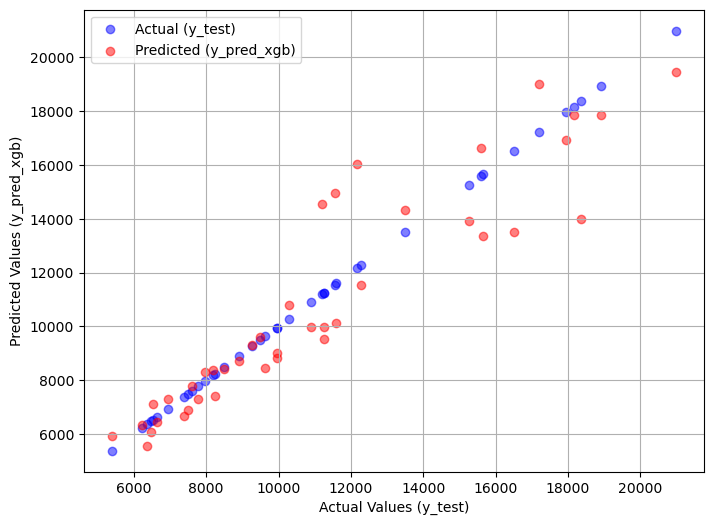

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_test,c='blue',marker='o', alpha=0.5,label='Actual (y_test)')
plt.scatter(y_test,y_pred_xgb,c='red',marker='o',alpha=0.5,label='Predicted (y_pred_xgb)')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_xgb)")
plt.legend()
plt.grid(True)
plt.show()

## Final Report

In [86]:
scores = [0.7086,0.7328,0.5503,0.8309,0.8908,0.8592]
algorithms = ['Linear Regression','KNN','SVR','Decision Tree','Random Forest','XGBoost']

for i in range(len(algorithms)):
    print("R2 Score in " + algorithms[i] + ' algorithm  is ' +' :- '+ f'{scores[i]}')

R2 Score in Linear Regression algorithm  is  :- 0.7086
R2 Score in KNN algorithm  is  :- 0.7328
R2 Score in SVR algorithm  is  :- 0.5503
R2 Score in Decision Tree algorithm  is  :- 0.8309
R2 Score in Random Forest algorithm  is  :- 0.8908
R2 Score in XGBoost algorithm  is  :- 0.8592


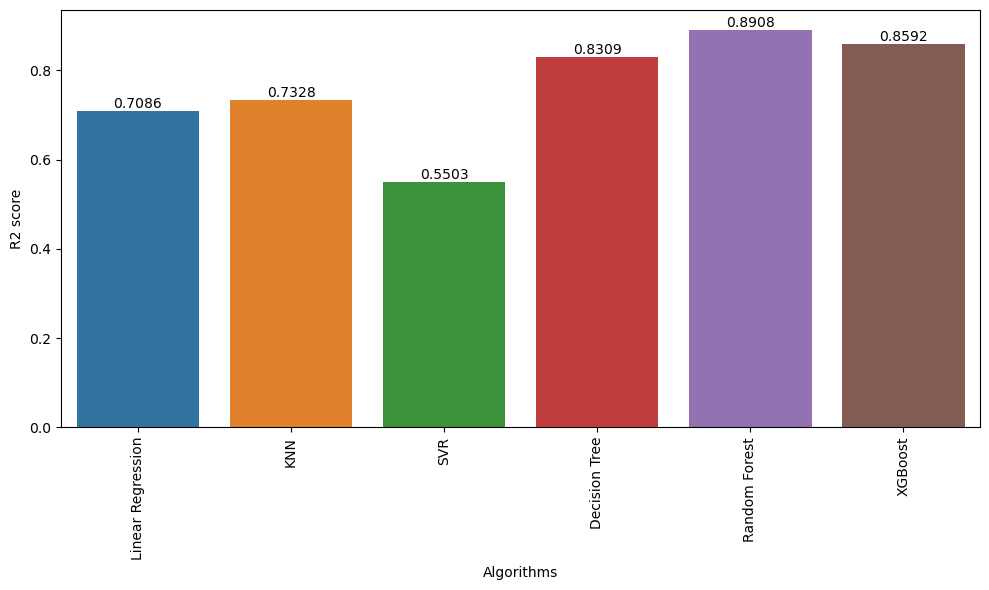

In [87]:
plt.figure(figsize=(10,6))
plt.xlabel('Algorithms')
plt.ylabel('R2 score')
ax = sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary

    "After trying various models, the Random Forest model gives an R2 score of 89.08% , indicating that it is the superior   model."

In [90]:
# Check for overfitting
y_pred_train = model_rfr.predict(x_train)

In [91]:
evaluation(y_train,y_pred_train)

MSE : 704314.7847481634
MAE :  587.9878354166665
R2_Score :  0.971311158578277


## Conclusion

    
    In conclusion, our machine learning model utilizing Random Forest has yielded best performance in predicting automobile import prices, achieving an R2 score of 89.08%. This score indicates that approximately 89.08% of the variability in the target variable, the import prices of automobiles, is explained by the features included in the model.

## Challenges Faced in Data and Techniques

**Data Quality and Preprocessing**


    The data was incomplete and hadling them is the initial challenge faced. Cleaning and preprocessing the data involves    handling null values, outliers and ensuring consistency in data formats.
    

**Feature Engineering**


    Deriving meaningful features from raw data presents a significant challenge. Techniques for feature selection and extraction play a crucial role in enhancing model performance by refining the input data, ensuring its relevance,and improving the model's ability to find out essential patterns and relationships.
    

**Categorical Variables**


    Encoding the categorical type columns like engine-type, fuel-type, etc to make them suitable for machine Learning model is what the challenge we faced. 

## Techniques Used in Automobile import price Prediction:

   **Model Selection:**

     Choosing the right machine learning algorithm or ensemble of algorithms can be challenging. Common choices
     for regression tasks like flight fare prediction include XGBoost, Random Forest, and Linear Regression.
    
   **Cross-Validation:**

      Cross-validation is used to assess the model's performance and ensure it generalizes well to unseen data. 
      Common techniques include k-fold cross-validation.
           
   **Hyperparameter Tuning:**

     Hyperparameter tuning using techniques like grid search or random search helps optimize model parameters 
     to achieve the best performance.
          
   **Ensemble Techniques:**

     Ensemble methods such as stacking or blending multiple models (e.g., XGBoost, Random Forest) can improve predictive accuracy.
     
   **Feature Engineering for Categorical Data:**

     Techniques such as one-hot encoding, label encoding, or target encoding are used to convert 
     categorical variables into a suitable format for modeling.